## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

## Loading the dataset

In [2]:
pdata = pd.read_csv("resources/planes.csv")

## Displaying the entire dataset

In [3]:
pdata

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


## Displaying information about the dataset (data types, non-null counts, etc.)

In [4]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


## Displaying the column names of the dataset

In [5]:
pdata.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Counting the number of null values in each column

In [6]:
null_count = pdata.isnull().sum()
null_count

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

## Importing Matplotlib for data visualization

In [7]:
import matplotlib.pyplot as plt

## Creating a plot to visualize the distribution of null values in each column

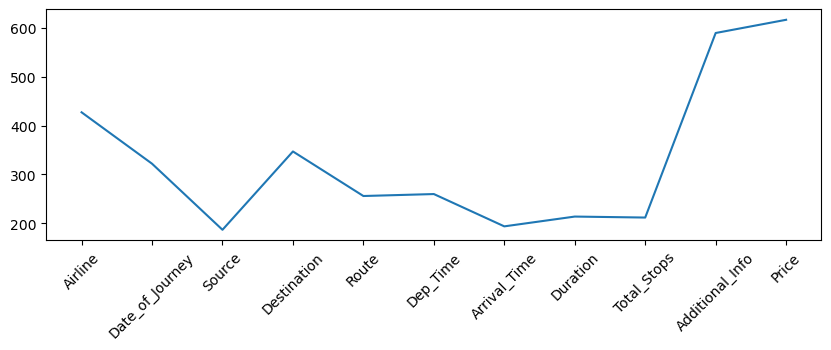

In [19]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45)
plt.plot(null_count)

## Check for outliers in numerical columns

In [9]:
numerical_columns = pdata.select_dtypes(include=['number'])
numerical_columns.describe()

,Price
count,10044.000000
mean,9044.411191
std,4472.304869
min,1759.000000
25%,5276.750000
50%,8366.000000
75%,12373.000000
max,54826.000000


## Summarizing the dataset statistics

In [10]:
summary_stats = pdata.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
               Price
count  10044.000000
mean    9044.411191
std     4472.304869
min     1759.000000
25%     5276.750000
50%     8366.000000
75%    12373.000000
max    54826.000000


## Calculating correlation matrix for numerical columns

In [20]:
numeric_columns = pdata.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

print("Correlation Matrix:\n")
correlation_matrix

Correlation Matrix:



,Price
Price,1.0


## Splitting the dataset into Train and Test sets

In [12]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Price', axis=1)
y = pdata['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
9791,Jet Airways,21/05/2019,Kolkata,NaN,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info
6785,Vistara,6/04/2019,Banglore,Delhi,BLR → DEL,19:30,22:15,2h 45m,non-stop,No info
2236,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → DEL → BLR,09:35,23:35,14h,1 stop,No info
3037,Multiple carriers,9/04/2019,Delhi,Cochin,DEL → BOM → COK,10:35,19:15,8h 40m,1 stop,No info
4863,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35 13 Jun,NaN,2 stops,In-flight meal not included
...,...,...,...,...,...,...,...,...,...,...
5734,IndiGo,27/05/2019,Delhi,Cochin,DEL → BOM → COK,04:55,21:00,16h 5m,1 stop,No info
5191,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:00,14h 5m,1 stop,No info
5390,NaN,9/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 10 Jun,23h 30m,2 stops,No info
860,Air India,9/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,07:05,09:25 10 May,26h 20m,2 stops,No info


In [14]:
X_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
7571,Air India,9/06/2019,Kolkata,Banglore,CCU → MAA → BLR,14:35,14:35 10 Jun,24h,1 stop,No info
5020,Air India,27/04/2019,Delhi,Cochin,DEL → COK,18:05,21:10,3h 5m,non-stop,No info
3404,SpiceJet,6/06/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No info
8365,Air India,15/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 May,21h 15m,2 stops,No info
3145,Multiple carriers,9/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,21:00,8h,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
3646,IndiGo,24/06/2019,Mumbai,Hyderabad,BOM → HYD,09:10,10:40,1h 30m,non-stop,No info
8401,Air India,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:00,19:15,12h 15m,NaN,No info
10271,Jet Airways,27/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 28 Mar,6h 35m,1 stop,No info
9040,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info


In [15]:
y_train

9791    14781.0
6785     5613.0
2236    14151.0
3037     6106.0
4863    10368.0
         ...   
5734     8784.0
5191    10678.0
5390     9968.0
860      9347.0
7270    10676.0
Name: Price, Length: 8528, dtype: float64

In [16]:
y_test

7571      6528.0
5020      5411.0
3404      3625.0
8365     11281.0
3145      7408.0
          ...   
3646      4049.0
8401         NaN
10271    12242.0
9040      7354.0
10567     3383.0
Name: Price, Length: 2132, dtype: float64